# Proyek Analisis Data: Bike Sharing Dataset
- **Nama :** Dimas Sukmana
- **Email :** sukmanadimas4@gmail.com
- **ID Dicoding :** MC299D5Y1765

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewa sepeda dalam beberapa tahun terakhir?
- Bagaimana tren perbandingan penyewa dalam beberapa tahun terakhir?
- Bagaimana jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana jumlah penyewaan sepeda berdasarkan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
# DataFrame Day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
# DataFrame Hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day.csv dan hour.csv bershasil diupload kedalam DataFrame day_df dan hour_df

### Assessing Data

**1. Mengecek Informasi DataFrame**

In [80]:
# Mengecek Info Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [81]:
# Mengecek Info Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- **day_df** : Terdapat kesalahan tipe data untuk kolom dteday
- **hour_df** : Terdapat kesalahan tipe data untuk kolom dteday

**2. Mengecek Duplikasi Data**

In [82]:
# Mengecek Data Duplicate day_df
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0


In [83]:
# Mengecek Data Duplicate hour_df
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


**Insight:**
- Berdasarkan hasil pengecekan pada day_df dan hour_df tidak ditemukan duplikasi data

**3. Mengecek Missing Value**

In [84]:
# Mengecek Missing value day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [85]:
# Mengecek Missing value hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Berdasarkan hasil pengecekan pada day_df dan hour_df tidak terdapat missing value

**4. Mengecek Parameter Statistik**

In [86]:
# Parameter Statistik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [87]:
# Parameter Statistik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil parameter statistik pada day_df dan hour_df tidak ditemukan keanehan atau inaccurate value

### Cleaning Data

**1. Mengubah Tipe Data menjadi datetime**

In [88]:
# Mengubah tipe data dteday pada day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [89]:
# Mengubah tipe data dteday pada hour_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data untuk kolom dteday pada day_df dan hour_df berhasil dirubah menjadi datetime

**2. Mengubah tipe data menjadi categorical**

In [90]:
# Mengubah tipe data menjadi categorical pada day_df
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [91]:
# Mengubah tipe data menjadi categorical pada hour_df
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data untuk kolom mnth, season, weekday, weathersit, yr, workingday pada day_df dan hour_df berhasil dirubah menjadi categorical

**3. Mengubah value menjadi keterangan**

In [92]:
# Mengubah value pada kolom mnth, season, weekday, weathersit, yr, workingday menjadi keterangan pada day_df berdasarkan readme.txt
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
# Mengubah value pada kolom mnth, season, weekday, weathersit, yr, workingday menjadi keterangan pada hour_df berdasarkan readme.txt
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berhasil merubah value untuk kolom mnth, season, weekday, weathersit, yr, workingday menjadi keterangan sesuai dengan file readme.txt

**4. Merubah Nama Kolom**

In [94]:
# Merubah nama kolom day_df
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
# Merubah nama kolom hour_df
hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berhasil merubah nama kolom agar menjadi lebih mudah untuk dibaca

**5. Menormalisasi Value berdasarkan readme.txt**

In [96]:
# Menormalisasikan nilai dari 'temp', 'atemp', 'humidity, 'windspeed' pada hour_df
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [97]:
# Menormalisasikan nilai dari 'temp', 'atemp', 'humidity, 'windspeed' pada hour_df
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['humidity'] = hour_df['humidity']*100
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Berhasil menormalisasikan value temp, atemp, humidity, dan windspeed sesuai dengan arahan file readme.txt

**Menyimpan Data yang telah dibersihkan**

In [101]:
day_df.to_csv('day_bikeshare_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Jumlah Penyewaan Sepeda Berdasarkan Tahun

In [102]:
day_df.groupby(by='year').agg({
    "total_count": "sum"
})

<ipython-input-102-172eb5a94551>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='year').agg({


,total_count
year,
2011,1243103
2012,2049576


**Insight:**
- Berdasarkan hasil pivot table tersebut, bisa ditarik kesimpulan bahwa tren jumlah penyewa mengalami kenaikan pada tahun 2012

### Jumlah Perbandingan Penyewa Berdasarkan Tahun

In [103]:
day_df.groupby(by='year').agg({
    "casual": "sum",
    "registered": "sum"
})

<ipython-input-103-5a3a6e79f45b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='year').agg({


,casual,registered
year,,
2011,247252,995851
2012,372765,1676811


**Insight:**
- Berdasarkan hasil pivot table tersebut, bisa ditarik kesimpulan bahwa tren jumlah penyewa yang telah mendaftar mengalami peningkatan hingga tahun 2012

### Jumlah Penyewaan Sepeda Berdasarkan Musim

In [104]:
day_df.groupby(by='season').agg({
    "total_count": "sum"
})

<ipython-input-104-3254bb9ef4e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


,total_count
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


**Insight:**
- Berdasarkan hasil pivot table tersebut, bisa ditarik kesimpulan bahwa jumlah penyewa mengalami kenaikan terbanyak pada musim gugur (Fall) dan penyewaan sepeda paling sedikit pada musim semi (spring)

### Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca

In [105]:
day_df.groupby(by='weather').agg({
    "total_count": "sum"
})

<ipython-input-105-843e4e7bcc9a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').agg({


,total_count
weather,
Clear/Partly Cloudy,2257952
Misty/Cloudy,996858
Light Snow/Rain,37869


**Insight:**
- Berdasarkan hasil pivot table tersebut, bisa ditarik kesimpulan bahwa penyewa sepeda cenderung menyewa pada cuaca yang cerah atau berawan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewa sepeda dalam beberapa tahun terakhir?

<ipython-input-156-21ebb8c94b5d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


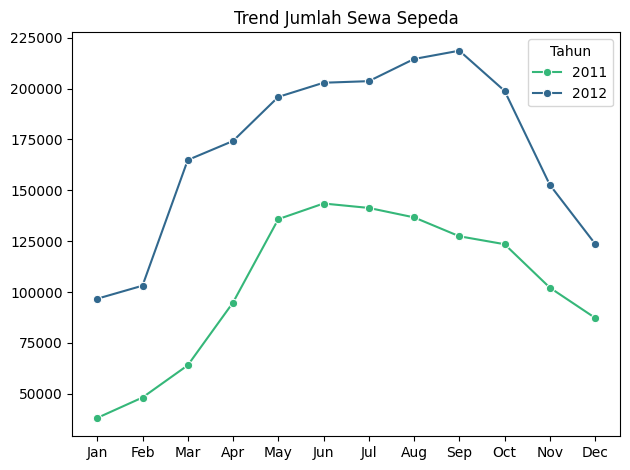

In [156]:
# Memvisualiasikan tren jumlah penyewa 1 tahun terakhir
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "total_count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="total_count",
    hue="year",
    palette="viridis_r",
    marker="o")

plt.title("Trend Jumlah Sewa Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewa sepeda tertinggi terjadi pada bulan September 2012
- Jumlah penyewa sepeda terendah terjadi pada bulan Januari 2011
- Jumlah penyewa sepeda setiap bulan pada tahun 2012 lebih tinggi dibandingkan dengan jumlah penyewa pada bulan yang sama di tahun 2011

### Pertanyaan 2: Bagaimana tren perbandingan penyewa dalam beberapa tahun terakhir?

<ipython-input-177-34b75ea23250>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renters = day_df.groupby('year')[['registered', 'casual']].sum().reset_index()


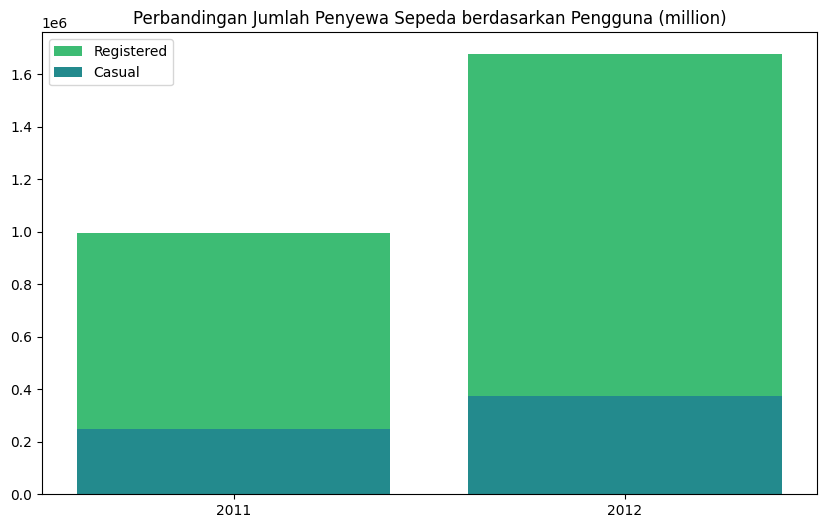

In [177]:
renters = day_df.groupby('year')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    renters['year'],
    renters['registered'],
    label='Registered',
    color='#3dbc74'
)

plt.bar(
    renters['year'],
    renters['casual'],
    label='Casual',
    color='#238a8d',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Perbandingan Jumlah Penyewa Sepeda berdasarkan Pengguna (million)')
plt.legend()
plt.show()

**Insight:**
- Jumlah penyewa sepeda mengalami lonjakan pada tahun 2012
- Jumlah penyewa sepeda yang telah mendaftar meningkat signifikan pada tahun 2012 dibanding pada tahun 2011
- Jumlah penyewa sepeda yang belum mendaftar (casual) juga mengalami peningkatan pada tahun 2012

### Pertanyaan 3: Bagaimana jumlah penyewaan sepeda berdasarkan musim?

<ipython-input-155-0657e51c7990>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


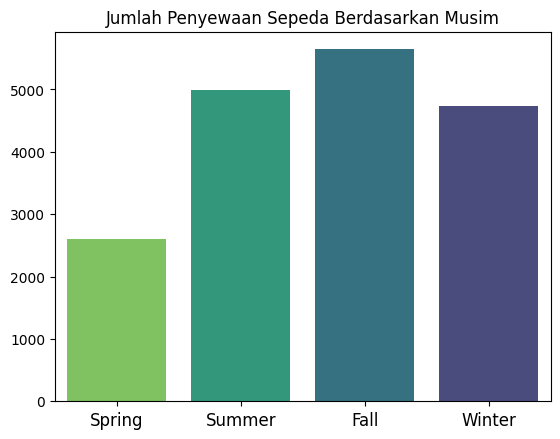

In [155]:
sns.barplot(
    data=day_df,
    x="season",
    y="total_count",
    palette="viridis_r",
    errorbar=None)

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Jumlah penyewa sepeda paling banyak terdapat pada musim gugur (fall)
- Sebaliknya jumlah penyewa sepeda paling sedikit terdapat pada musim semi (spring)

### Pertanyaan 4: Bagaimana jumlah penyewaan sepeda berdasarkan kondisi cuaca?

<ipython-input-148-70783b1b808a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


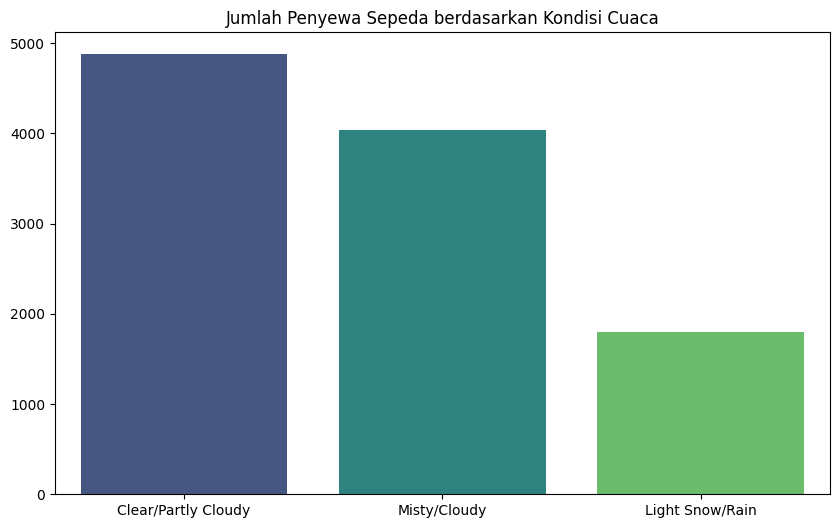

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather',
    y='total_count',
    data=day_df,
    errorbar=None,
    palette='viridis')

plt.title('Jumlah Penyewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**
- Penyewa lebih banyak menggunakan sepeda disaat kondisi cuaca Cerah atau Berawan
- Jumlah penyewa sangat sedikit apabila kondisi cuaca hujan atau bersalju

## Conclusion

### Pertanyaan 1: Bagaimana tren jumlah penyewa sepeda dalam beberapa tahun terakhir?


Tren jumlah penyewa sepeda menunjukkan peningkatan dari tahun 2011 ke 2012. Setiap bulan di tahun 2012 memiliki jumlah penyewa yang lebih tinggi dibandingkan bulan yang sama di tahun 2011. Peningkatan paling signifikan terjadi mulai bulan April hingga Juni pada 2011 dan 2012, dan tren penyewaan mencapai puncaknya pada bulan September di tahun 2012. Setelah September, jumlah penyewa mulai menurun hingga akhir tahun. Secara keseluruhan, tren ini menunjukkan bahwa jumlah penyewa sepeda mengalami pertumbuhan dari tahun ke tahun.


### Pertanyaan 2: Bagaimana tren perbandingan penyewa dalam beberapa tahun terakhir?

Jumlah penyewa sepeda meningkat dari tahun 2011 ke 2012, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual). Namun, peningkatan lebih signifikan terjadi pada penyewa terdaftar dibandingkan penyewa kasual. Hal ini menunjukkan tren bahwa semakin banyak pengguna yang memilih untuk mendaftar sebagai pelanggan tetap daripada hanya menyewa secara kasual. Secara keseluruhan, tren ini mencerminkan pertumbuhan jumlah pengguna sepeda, terutama di kalangan penyewa terdaftar.

### Pertanyaan 3: Bagaimana jumlah penyewaan sepeda berdasarkan musim?

Jumlah penyewaan sepeda bervariasi berdasarkan musim. Penyewaan sepeda tertinggi terjadi pada musim gugur (fall), diikuti oleh musim panas (summer). Sementara itu, jumlah penyewaan menurun pada musim dingin (winter), dan paling rendah terjadi pada musim semi (spring). Hal ini menunjukkan bahwa musim panas dan gugur adalah periode dengan aktivitas penyewaan sepeda yang lebih tinggi, kemungkinan karena cuaca yang lebih mendukung untuk bersepeda, sedangkan musim semi dan terutama musim dingin memiliki lebih sedikit penyewa, kemungkinan karena kondisi cuaca yang kurang mendukung.

### Pertanyaan 4: Bagaimana jumlah penyewaan sepeda berdasarkan kondisi cuaca?

Jumlah penyewaan tertinggi terjadi saat cuaca cerah atau berawan (Clear/Partly Cloudy). Sementara itu, pada kondisi hujan ringan atau bersalju (Light Snow/Rain), jumlah penyewa turun drastis hingga di bawah 2.000 orang. Hal ini menunjukkan bahwa cuaca berpengaruh signifikan terhadap tingkat penyewaan sepeda. Orang cenderung lebih banyak menyewa sepeda saat cuaca cerah atau mendung, sedangkan dalam kondisi hujan atau bersalju, minat untuk menyewa sepeda menurun secara signifikan.